<a href="https://colab.research.google.com/github/temalkin/pyTorch-learning/blob/main/iris_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [114]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  #Hidden Layer1 (number of neurons) -->
  #H2 (n) -->
  #output (3 classes of Iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))

    return x

In [115]:
# Picking manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [118]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [119]:
# Change last column to number
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

/tmp/ipython-input-3420899325.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [120]:
# Train Test Split! Set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [121]:
# Conver to numpy arrays
X = X.values
y = y.values

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [124]:
# Conver X  features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [125]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [126]:
# Set the criterion of model to measure the error, how far off the predictionas are from
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesnt go down after a bunch iterations, want to lower lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [127]:
# Train our model!
# Epochs (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Prine every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propogation: take the error rate of forward propogation and feed it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8512223958969116
Epoch: 30 and loss: 0.654869019985199
Epoch: 40 and loss: 0.44905662536621094
Epoch: 50 and loss: 0.2707386612892151
Epoch: 60 and loss: 0.15461841225624084
Epoch: 70 and loss: 0.09299226105213165
Epoch: 80 and loss: 0.06447023898363113
Epoch: 90 and loss: 0.050585027784109116


Text(0.5, 0, 'Epoch')

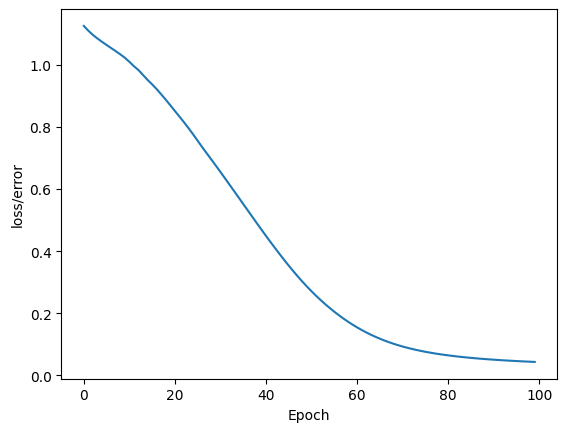

In [128]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [129]:
# Evaluate Model on Test Data Set (validatw model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find loss / error

In [130]:
loss

tensor(0.1296)

In [131]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'Setosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Verginica'

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1


print(f'We got {correct} correct')

1.) tensor([0.0000, 7.4818, 9.9517]) 	 2 	 2
2.) tensor([ 0.0000,  7.7416, 14.4150]) 	 2 	 2
3.) tensor([ 0.0000,  9.1741, 15.2260]) 	 2 	 2
4.) tensor([0.2420, 8.3711, 4.5725]) 	 1 	 1
5.) tensor([ 0.0000,  8.4455, 12.5213]) 	 2 	 2
6.) tensor([1.6580, 8.0895, 2.0248]) 	 1 	 1
7.) tensor([0.0000, 8.1067, 9.3146]) 	 2 	 2
8.) tensor([0.3616, 8.4538, 4.3424]) 	 1 	 1
9.) tensor([ 0.0000,  8.2780, 10.8831]) 	 2 	 2
10.) tensor([ 0.0000,  8.2340, 15.2944]) 	 2 	 2
11.) tensor([0.0000, 8.0207, 8.7722]) 	 2 	 2
12.) tensor([9.0044, 3.5022, 0.0000]) 	 0 	 0
13.) tensor([8.0835, 3.2078, 0.0000]) 	 0 	 0
14.) tensor([2.2655, 6.5108, 0.4715]) 	 1 	 1
15.) tensor([8.0545, 3.9531, 0.0000]) 	 0 	 0
16.) tensor([0.0000, 8.1667, 8.0483]) 	 2 	 1
17.) tensor([8.3930, 3.3382, 0.0000]) 	 0 	 0
18.) tensor([0.0000, 7.6729, 9.5912]) 	 1 	 2
19.) tensor([8.6390, 3.3854, 0.0000]) 	 0 	 0
20.) tensor([7.5293, 3.3366, 0.0000]) 	 0 	 0
21.) tensor([2.0055, 7.1311, 1.1164]) 	 1 	 1
22.) tensor([ 0.0000,  8.488

In [134]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [135]:
with torch.no_grad():
  print(model(new_iris))

tensor([8.5490, 3.3566, 0.0000])


In [136]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [137]:
with torch.no_grad():
  print(model(newer_iris))

tensor([ 0.0000,  7.6352, 10.1846])


In [138]:
# Save our NN Model
torch.save(model.state_dict(), 'my_test.pt')

In [140]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_test.pt'))

<All keys matched successfully>

In [141]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)